In [1]:
%matplotlib notebook
import serial
from time import time
import matplotlib.pyplot as plt
import datetime as dt
now = dt.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

In [2]:
# initial values for arduino
port = '/dev/ttyUSB0'

# Arduino machine starting up
# probably not evil
hal9001 = serial.Serial(port,9600)

<IPython.core.display.Javascript object>


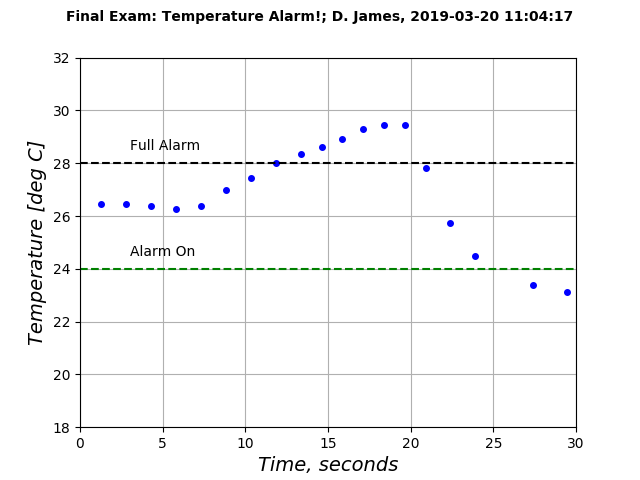

/home/daj/Documents/class/epss_171_computingGeoscience/venv171/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [3]:
# set plot to animated
plt.ion() 

start_time = time()
timepoints = []
ydata = []
yrange = [18,32]
view_time = 30 # seconds of data to view at once
duration = 30 # total seconds to collect data

fig1 = plt.figure()
# http://matplotlib.org/users/text_props.html
fig1.suptitle('Final Exam: Temperature Alarm!; D. James, '+now, fontsize='10', fontweight='bold')
plt.xlabel('Time, seconds', fontsize='14', fontstyle='italic')
plt.ylabel('Temperature [deg C]', fontsize='14', fontstyle='italic')
plt.axes().grid(True)
line1, = plt.plot(ydata,marker='o',markersize=4,linestyle='none',markerfacecolor='b')
line2, = plt.plot(ydata,marker='o',markersize=4,linestyle='none',markerfacecolor='r')
line3, = plt.plot(ydata,marker='o',markersize=4,linestyle='none',markerfacecolor='m')
plt.ylim(yrange)
plt.xlim([0,view_time])
plt.axhline(y=24,color='g',linestyle='--')
plt.axhline(y=28,color='k',linestyle='--')
plt.text(3,24.5,'Alarm On')
plt.text(3,28.5,'Full Alarm')

# flush any junk left in the serial buffer
hal9001.flushInput()
hal9001.reset_input_buffer() # for pyserial 3.0+
run = True

# collect the data and plot a moving frame
while run:
    hal9001.reset_input_buffer()
    data = float(hal9001.readline().strip())
    
    # sometimes the incoming data is garbage, so just 'try' to do this
    try:
        # store the entire dataset for later
        ydata.append(data)
        timepoints.append(time()-start_time)
        current_time = timepoints[-1]
        line1.set_xdata(timepoints)
        line1.set_ydata(ydata)
        
        if(data < 24):
            line1.set_color('b')
        elif(data >= 24 and data < 28):
            line1.set_color('k')
        elif(data >= 28):
            line1.set_color('g')
        
            
        # when time's up, kill the collect+plot loop
        if timepoints[-1] > duration: run=False
    
    # if the try statement throws an error, just do nothing
    except: pass
    
    # update the plot
    fig1.canvas.draw()

hal9001.close()

In [4]:
fig1.savefig('plot.png')